In [1]:
import os, sys
from scipy import stats
import numpy as np
import pandas as pd

from   scipy import stats
#-- for ANOVA
import statsmodels.api as sm
from   statsmodels.formula.api import ols

#-- for Tukey
from statsmodels.stats.multicomp import MultiComparison

sys.path.insert(1, '../libs/')
from stat_lib import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Comparando-se o mesmo grupo muitas vezes

  - ANOVA
  - Tukey
  - Dunnett

### ANOVA - Analysis of variance

H0: Test for Equality of all means 
  - all random variable are drawn from the same distribution
  
Ha: At least one distribution has different mean (expectation)  
  - at least on random variable is drawn from a different distribution

https://en.wikipedia.org/wiki/One-way_analysis_of_variance

### ANOVA - uses the F-statistics to calculate if the sum of errors between and withing groups are similar (H0)


<font size="5">$F-stat = \frac{MS_B}{MS_W}$</font>

<br>

where

<font size="5">$Mean\ Square = MS = \frac{SS}{dof}$</font>

<br>
therefore,


<font size="5">$MS_B = \frac{SSE_B}{dof_B}$</font>

<font size="5">$MS_W = \frac{SSE_W}{dof_W}$</font>

<br> 

#### F-distribution

![f_distribuition wiki](../figure/f_distribuition_wiki.png)


### ANOVA - sum of erros within x between groups are the same?

  - What do you mean by error?
    - Error is the diference between a cell (single value) and each group mean
    - Another error is the difference between a group mean and the overall mean

### How to calculate it?

  - Calculate the means for each group (column) and overall mean
    
<br>  

![anova1](../figure/anova01.png)

<br>

### Lets calculate the means for each group (columns) (\<Yj>)
### and the overall mean - mean of all groups (\<Y>)

![anova1](../figure/anova02.png)

<br>

## Lets calculate the between groups sum of squared differences
  - is the sum, for each group, 
    - of the squared difference between the group mean less the overall mean
    - times the number of lines to achieve the group total difference
 
### Degree of freedom (dof or S)
  - number of groups - 1

<br>

![between groups](../figure/anova03.png)

## Lets calculate the within squared sum of errors
  - for each cell - its value - group mean
  - thereafter, you sum for each column, the squared values
  
### Degree of freedom (dof or f)
  - is the number of grous * (lines - 1)

<br>

![within sum of errors](../figure/anova04.png)

![within sum of errors](../figure/anova04b.png)

<br>

## Lets calculate the F-statistics for between over within groups

<br>

![anova1](../figure/anova05.png)

<br>

## Lets see the F-distribution 
  - dof = (2, 15)

<br>

![anova1](../figure/f-stat_result.png)

### Exercício:
  - Como você estimaria o p-value?
  - O que signfica este p-value?
  - Você consegue desenhar as 3 distribuições (3 grupos)?

### Novos exemplos
  - dadas 5 hipotéticas amostras
  - com media 140 e variando de 140 a 144
  - com SSD 10, variando de 10 a 10.4

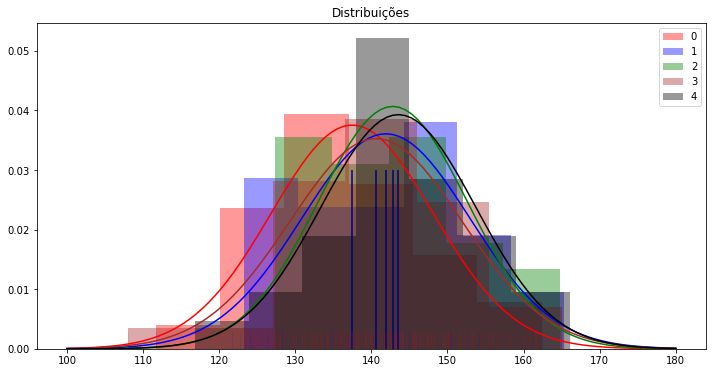

In [3]:
samps=[]; mus = []; sdvs = []
N   = 30
samples = 5
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black']

mu = 140; delmu = 1
sdv = 10; delsdv = .1

for i in range(samples):
    samps.append(np.random.normal(loc=mu, scale=sdv, size=N))
    mu += delmu
    sdv += delsdv

    mus.append(np.mean(samps[i]))
    sdvs.append(np.std(samps[i]))

fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(100, 180, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, rug=True, label=i, norm_hist=True, color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, rug=True, label=i, norm_hist=True, color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title)
plt.legend();

### As distribuições são nomais? teste de Shaprio-Wilkis

In [4]:
for i in range(samples):
    ret1, text1, text_stat1, stat1, pvalue1 = test_normality_desc(samps[i])
    print(text1, text_stat1)

A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 9.80e-01 (NS)
A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 3.75e-01 (NS)
A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 3.46e-01 (NS)
A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 7.05e-01 (NS)
A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 8.54e-01 (NS)


### Alguma distribuição tem média diferente? one-way ANOVA

In [29]:
def test_one_way_ANOVA5 (samp1, samp2, samp3, samp4, samp5, alpha = 0.05):
    # teste de variancias de Fisher - one way ANOVA (analysis of variance)
    stat, pvalue = stats.f_oneway(samp1, samp2, samp3, samp4, samp5)

    if pvalue > alpha:
        text = 'As distribuições têm médias similares (não se rejeita a H0)'
        ret = True
    else:
        text = 'As distribuições não têm médias similares (rejeita-se a H0)'
        ret = False

    text_stat = 'p-value %.2e (%s)'%(pvalue, stat_asteristics(pvalue))

    return ret, text, text_stat, stat, pvalue

In [30]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA5(samps[0],samps[1],samps[2],samps[3],samps[4])
text, text_stat, stat

('As distribuições não têm médias similares (rejeita-se a H0)',
 'p-value 3.56e-32 (***)',
 67.57212865923825)

### Uma outra forma de calcular ANOVA - tabela summary

In [31]:
#-- tabela stack
df = pd.DataFrame([samps[0], [0]*N]).T
df.columns = ['val', 'group']

for i in range(1,5):
    dfa = pd.DataFrame([samps[i], [i]*N]).T
    dfa.columns = ['val', 'group']
    
    df = df.append(dfa)

df.shape, df.group.unique()

((150, 2), array([0., 1., 2., 3., 4.]))

In [32]:
model = ols('val ~ group', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
group,35999.068167,1.0,263.717688,1.072007e-34
Residual,20202.900015,148.0,NaN,NaN


### group - SM (entre groups - between)
### residual - SM (dentros dos grupos - within)

F = SM_b / SM_w

In [33]:
SMb = 353.028 /1
SMw = 17209.691 /148
SMb, SMw,  SMb/SMw

(353.028, 116.28169594594594, 3.0359722321568707)

### Alterando somente a variância das distribuições:
  - as medias ficam inalteradas
  - os SSD variam [10, 30, 50, 70, 90]
  - o resultado é similar ao anterior!!!
  - porque?

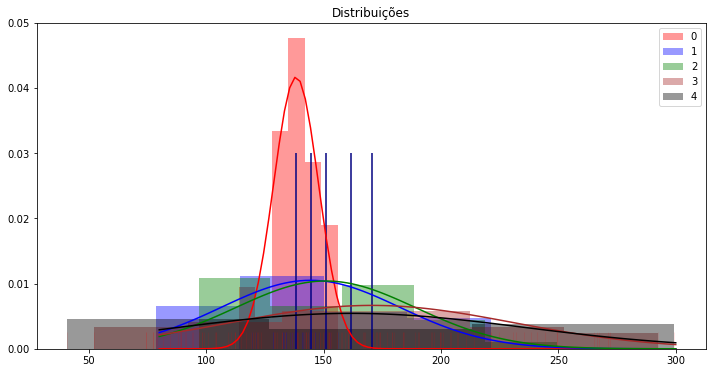

In [34]:
samps=[]; mus = []; sdvs = []
N   = 30
samples = 5
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black']

mu = 140; delmu = 2
sdv = 10; delsdv = 20

for i in range(samples):
    samps.append(np.random.normal(loc=mu, scale=sdv, size=N))
    mu += delmu
    sdv += delsdv

    mus.append(np.mean(samps[i]))
    sdvs.append(np.std(samps[i]))

fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(80, 300, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, label=i, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, label=i, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title)
plt.legend();

In [35]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA5(samps[0],samps[1],samps[2],samps[3],samps[4])
text, text_stat

('As distribuições têm médias similares (não se rejeita a H0)',
 'p-value 8.90e-02 (NS)')

In [36]:
df = pd.DataFrame([samps[0], [0]*N]).T
df.columns = ['val', 'group']

for i in range(1,5):
    dfa = pd.DataFrame([samps[i], [i]*N]).T
    dfa.columns = ['val', 'group']
    
    df = df.append(dfa)

df.shape, df.group.unique()

((150, 2), array([0., 1., 2., 3., 4.]))

In [37]:
model = ols('val ~ group', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
group,16092.227724,1.0,6.540461,0.011551
Residual,364140.932343,148.0,NaN,NaN


In [38]:
SMb = 6928.082 /1
SMw = 553717.435 /148
SMb, SMw,  SMb/SMw

(6928.082, 3741.3340202702707, 1.8517678353400593)

### Alterando somente as medias das distribuições:
  - os SSD ficam inalterados
  - as medias variam [140, 150, 160, 170, 180]
  - o resultado é totalmente diferente
  - porque?

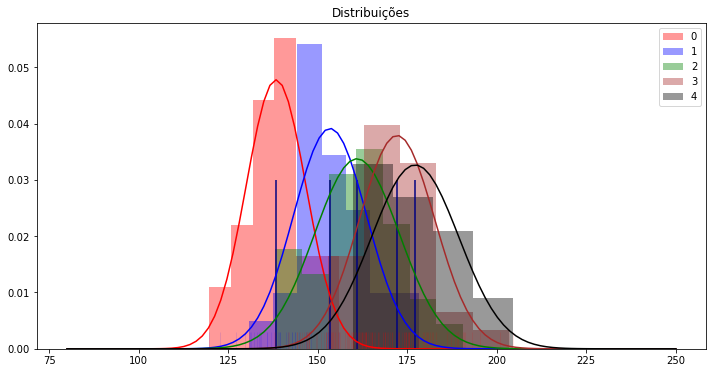

In [39]:
samps=[]; mus = []; sdvs = []
N   = 30
samples = 5
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black']

mu = 140; delmu = 10
sdv = 10; delsdv = .5

for i in range(samples):
    samps.append(np.random.normal(loc=mu, scale=sdv, size=N))
    mu += delmu
    sdv += delsdv

    mus.append(np.mean(samps[i]))
    sdvs.append(np.std(samps[i]))

fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(80, 250, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, label=i, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, label=i, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title)
plt.legend();

In [40]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA5(samps[0],samps[1],samps[2],samps[3],samps[4])
text, text_stat

('As distribuições não têm médias similares (rejeita-se a H0)',
 'p-value 6.02e-30 (***)')

In [41]:
df = pd.DataFrame([samps[0], [0]*N]).T
df.columns = ['val', 'group']

for i in range(1,5):
    dfa = pd.DataFrame([samps[i], [i]*N]).T
    dfa.columns = ['val', 'group']
    
    df = df.append(dfa)

df.shape, df.group.unique()

((150, 2), array([0., 1., 2., 3., 4.]))

In [42]:
df.head(2)

,val,group
0,139.462199,0.0
1,133.878760,0.0


In [43]:
model = ols('val ~ group', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
group,27901.047702,1.0,229.807935,6.360492e-32
Residual,17968.722738,148.0,NaN,NaN


In [44]:
SMb = 27901.048 /1
SMw = 17968.723 /148
SMb, SMw,  SMb/SMw

(27901.048, 121.41029054054056, 229.80793370792122)

#### F-statistics x summary table

In [ ]:
(29681.66/1) / (20468.15/148)

### Tukey test - Post-hoc test 

É chamado de test de Tukey, ou método de Tukey, ou teste de significância honesta de Tukey
 
**POST-HOC** - depois disto

**ANOVA** diz se as distribuições são diferentes mas não diz qual e quanto.

https://en.wikipedia.org/wiki/Tukey%27s_range_test

/media/flalix/5c1ba0b4-f897-451c-9068-ac5e57194590/flalix/anaconda3/envs/py_env37/lib/python3.7/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<Figure size 3600x2400 with 0 Axes>

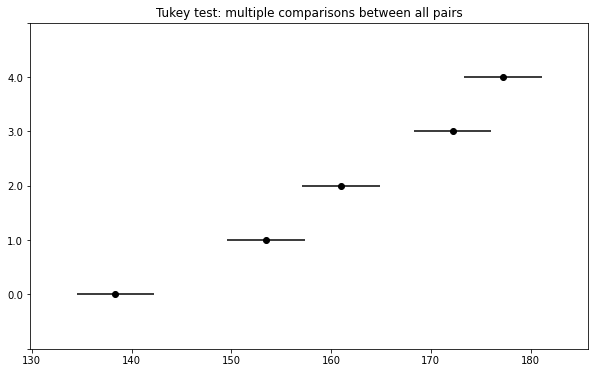

In [45]:
plt.figure(figsize=(12,8), dpi=300)

cardata = MultiComparison(df.val, df.group)
results = cardata.tukeyhsd()

title  = "Tukey test: multiple comparisons between all pairs"

results.plot_simultaneous()
plt.title(title);

### Combinações

comb(5 2) = 5! / 3! 2! = 5 * 4 / 2 = 20 / 2 = 10

In [46]:
for i in range(samples-1):
    for j in range(i+1, samples):
        print(i, j)

0 1
0 2
0 3
0 4
1 2
1 3
1 4
2 3
2 4
3 4


In [47]:
results.meandiffs

array([15.07300913, 22.60611879, 33.79955609, 38.85588566,  7.53310966,
       18.72654696, 23.78287653, 11.19343731, 16.24976688,  5.05632957])

In [48]:
results.confint

array([[ 7.30470328, 22.84131497],
       [14.83781294, 30.37442463],
       [26.03125025, 41.56786193],
       [31.08757982, 46.6241915 ],
       [-0.23519618, 15.3014155 ],
       [10.95824112, 26.49485281],
       [16.01457069, 31.55118238],
       [ 3.42513146, 18.96174315],
       [ 8.48146103, 24.01807272],
       [-2.71197627, 12.82463541]])

In [49]:
results.pvalues

array([0.001     , 0.001     , 0.001     , 0.001     , 0.06218789,
       0.001     , 0.001     , 0.00101403, 0.001     , 0.37971606])

In [51]:
results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,15.073,0.001,7.3047,22.8413,True
0.0,2.0,22.6061,0.001,14.8378,30.3744,True
0.0,3.0,33.7996,0.001,26.0313,41.5679,True
0.0,4.0,38.8559,0.001,31.0876,46.6242,True
1.0,2.0,7.5331,0.0622,-0.2352,15.3014,False
1.0,3.0,18.7265,0.001,10.9582,26.4949,True
1.0,4.0,23.7829,0.001,16.0146,31.5512,True
2.0,3.0,11.1934,0.001,3.4251,18.9617,True
2.0,4.0,16.2498,0.001,8.4815,24.0181,True
3.0,4.0,5.0563,0.3797,-2.712,12.8246,False


### Dunnett test

  - Um único controle
  - Múltiplos cases
  
Este é o caso quando queremos fazer um experimento de processo anti-inflamatório:
  - Temos uma cultura de células em PBS
  - Adicionamos um sinal inflmatório e medimos TNF após 30 min
  - Após uma hora adicionamos dexametasona e medimos TNF-A após 2 horas
  - Repetimos o experimento acima adicionando uma dada droga e medindo o TNF-A após 2 horas
  
    - Controle: PBS
    - Case: controle positivo - inflamação
    - Case: controle negativo - dexametazona
    - Cases: mais 3 cases com 3 outras drogas
  

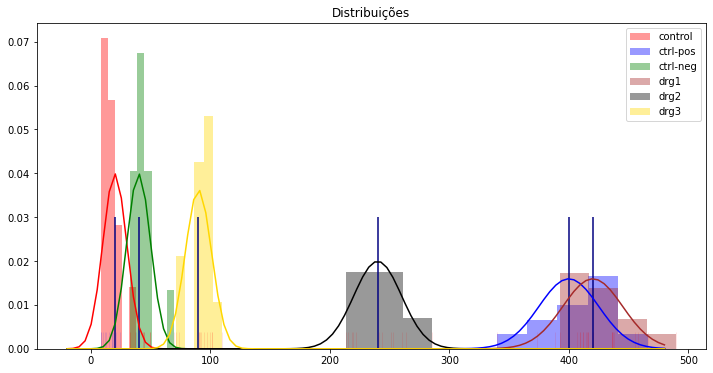

In [53]:
samps=[]; mus = []; sdvs = []
N   = 12
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black', 'gold']
sampNames = ['control', 'ctrl-pos', 'ctrl-neg', 'drg1', 'drg2', 'drg3']

# TNF-A ... pmol
mus  = [20, 400, 40, 420, 240, 90]
sdvs = [10, 25,  10,  25,  20, 11]
samples = len(mus)

for i in range(samples):
    samps.append(np.random.normal(loc=mus[i], scale=sdvs[i], size=N))


fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(-20, 480, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, label=sampNames[i], color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, label=sampNames[i], color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title)
plt.legend;

### Barplot

In [54]:
df2 = pd.DataFrame([samps[0], [sampNames[0]]*N]).T
df2.columns = ['val', 'group']

for i in range(1,samples):
    dfa = pd.DataFrame([samps[i], [sampNames[i]]*N]).T
    dfa.columns = ['val', 'group']
    
    df2 = df2.append(dfa)

df2.shape, df2.group.unique()

((72, 2),
 array(['control', 'ctrl-pos', 'ctrl-neg', 'drg1', 'drg2', 'drg3'],
       dtype=object))

Text(0.5, 0, '')

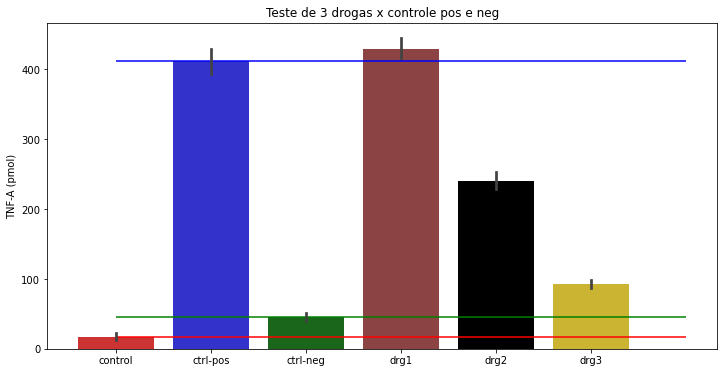

In [55]:
plt.figure(figsize=(12,6))
ci = 95

ax = sns.barplot(x="group", y="val", data=df2, saturation=0.6, palette=colors, ci=ci)

for i in range(3):
    mu = np.mean(samps[i])
    plt.hlines(mu, 0, 6, color = colors[i])

plt.title("Teste de 3 drogas x controle pos e neg")
plt.ylabel('TNF-A (pmol)')
plt.xlabel('')

In [ ]:
sns.boxplot(x="group", y="val", data=df2, saturation=0.6, palette=colors);

### 3 gráficos juntos

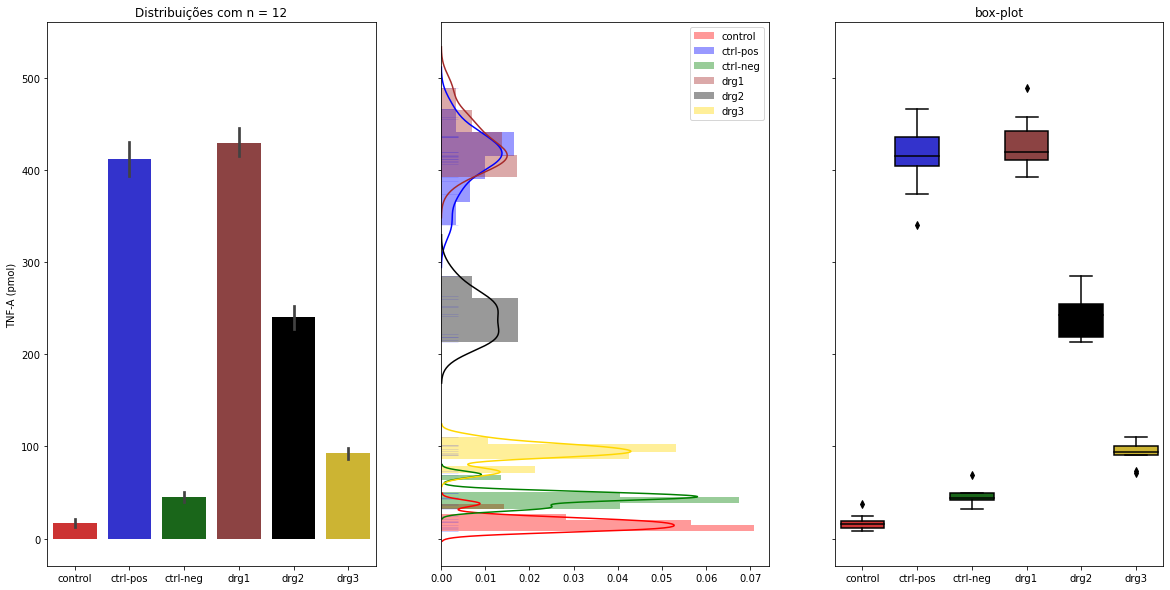

In [56]:
ci = 95

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10), sharey=True)

ret = sns.barplot(x="group", y="val", data=df2, saturation=0.6, palette=colors, ci=ci, ax=ax[0])
    
ax[0].set_ylabel('TNF-A (pmol)')
ax[0].set_xlabel('')
ax[0].set_title("Distribuições com n = %d"%(N))

seqx = np.linspace(-20, 480, 100)

for i in range(samples):
    retQ = sns.distplot(samps[i], kde=True, rug=True, norm_hist=True, label=sampNames[i], color=colors[i], vertical=True, rug_kws={"color": 'blue', "alpha": .1,}, ax=ax[1])
    # ax[1].vlines(mus[i], 0, hline, color = 'navy')
    
    # sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i], ax=ax[1])

ax[1].legend()

sns.boxplot(x="group", y="val", data=df2, saturation=0.6, palette=colors, ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].set_title("box-plot");

In [ ]:
df2.group.unique()

In [ ]:
df2.head()

In [57]:
try:
    os.mkdir('../tmp')
except:
    pass

df2.to_csv('../tmp/table.tsv', sep='\t', index=False)

In [60]:
df3 = pd.read_csv('../tmp/table.tsv', sep='\t')
print(df3.shape, N*samples)
df3.head(3)

(72, 2) 72


,val,group
0,37.942504,control
1,8.521954,control
2,15.063139,control


In [61]:
df3.tail(3)

,val,group
69,100.020935,drg3
70,101.278255,drg3
71,94.890704,drg3


### Interfaceando R

In [62]:
os.system("Rscript calcd.R")

0

In [63]:
fname = 'dunnet_result.tsv'
filefull = os.path.join('../tmp/', fname)
    
dfd = pd.read_csv(filefull, sep='\t')
dfd

,estimate,tstat,pvalue
control - ctrl-pos,-395.021341,-46.027875,0.000000
ctrl-neg - ctrl-pos,-367.078523,-42.771979,0.000000
drg1 - ctrl-pos,17.238135,2.008587,0.176387
drg2 - ctrl-pos,-171.580683,-19.992576,0.000000
drg3 - ctrl-pos,-319.274497,-37.201855,0.000000


In [64]:
gamma = stats.t.ppf(0.025, N-1)
gamma

-2.200985160082949

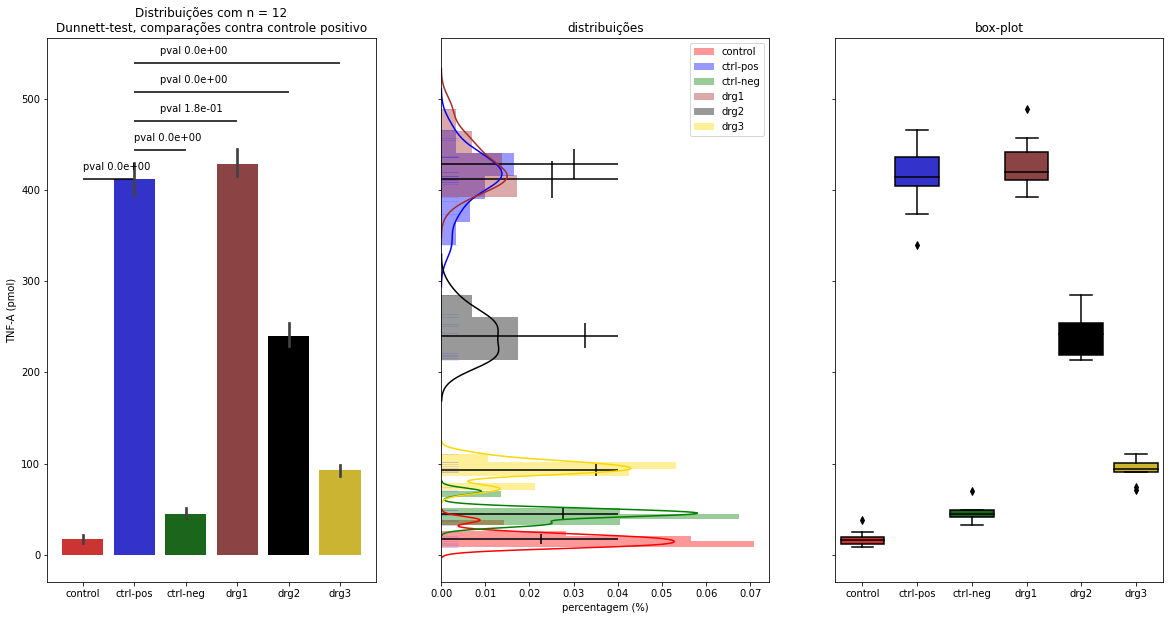

In [65]:
ci = 95

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10), sharey=True)

ret = sns.barplot(x="group", y="val", data=df2, saturation=0.6, palette=colors, ci=ci, ax=ax[0])

ax[0].set_ylabel('TNF-A (pmol)')
ax[0].set_xlabel('')
ax[0].set_title("Distribuições com n = %d\nDunnett-test, comparações contra controle positivo"%(N))

y1 = 380; dely = 32

#-- barras de erros
for j in [0,1,2,3, 4]:
    y1 += dely
    x1 = 0 if j==0 else j+1
    xt = j if j<=1 else 1.5

    ax[0].hlines(y=y1, xmin=1, xmax=x1, colors='black')
    text = 'pval %.1e'%(dfd.iloc[j].pvalue)

    ax[0].text(x=xt, y=y1+10, s=text)

seqx = np.linspace(-20, 480, 100)

for i in range(samples):
    retQ = sns.distplot(samps[i], kde=True, rug=True, norm_hist=True, label=sampNames[i], color=colors[i], vertical=True, rug_kws={"color": 'blue', "alpha": .1,}, ax=ax[1])

ax[1].legend()
xerror = 0.02; delxerror = 0.0025

#--- medias e barra de erro na distribuição
for i in range(samples):
    mu    = np.mean(samps[i])
    SEM   = np.std(samps[i])/np.sqrt(N)
    error = gamma * SEM

    xerror += delxerror

    ax[1].hlines(y=mu, xmin=0, xmax=0.04, colors='black')
    ax[1].vlines(x=xerror, ymin=mu+error, ymax=mu-error, colors='black')

ax[1].set_ylabel('')
ax[1].set_xlabel('percentagem (%)')
ax[1].set_title("distribuições");


sns.boxplot(x="group", y="val", data=df2, saturation=0.6, palette=colors, ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].set_title("box-plot");